In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

Suppose we are giving two students a multiple-choice exam with 40 questions, 
where each question has four choices. We don't know how much the students
have studied for this exam, but we think that they will do better than just
guessing randomly.

1. What are the parameters of interest?
2. What is our likelihood?
3. What prior should we use?
4. What is the prior probability P(theta>.25)? P(theta>.5)? P(theta>.8)?
5. Suppose the first student gets 33 questions right. What is the posterior
   distribution for theta1? P(theta1>.25)? P(theta1>.5)? P(theta1>.8)?
   What is a 95% posterior credible interval for theta1?
6. Suppose the second student gets 24 questions right. What is the posterior
   distribution for theta2? P(theta2>.25)? P(theta2>.5)? P(theta2>.8)?
   What is a 95% posterior credible interval for theta2?
7. What is the posterior probability that theta1>theta2, i.e., that the 
   first student has a better chance of getting a question right than
   the second student?

### Solutions

1.  Parameters of interest are $theta1=true$ probability the first student
    will answer a question correctly, and $theta2=true$ probability the second
    student will answer a question correctly.


2.  Likelihood is Binomial(40, theta), if we assume that each question is 
    independent and that the probability a student gets each question right 
    is the same for all questions for that student.

3.  The conjugate prior is a beta prior. Plot the density with python.

In [2]:
from scipy.stats import beta

n = 40
theta = np.arange(0, 1, 0.01)

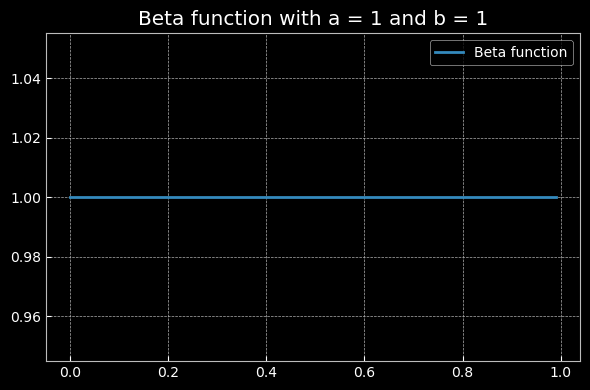

In [3]:
a, b = 1, 1 # Prio mean of 1 alpha / alpha +  eta
rv = beta(a, b)
pdf_val = rv.pdf(theta)

plt.plot(theta, pdf_val, label = 'Beta function')
plt.legend()
plt.title('Beta function with a = {} and b = {}'.format(a, b))
plt.tight_layout()
plt.show()

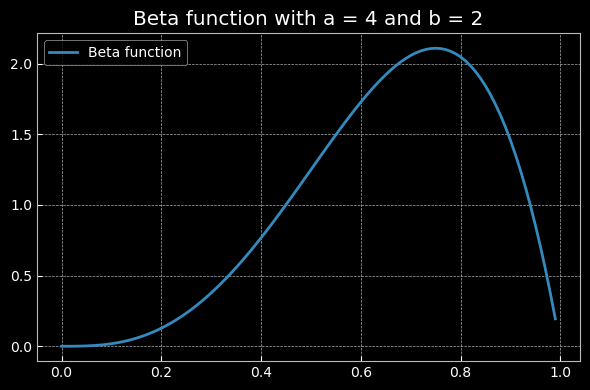

In [4]:
a, b = 4, 2 # Prio mean of 2 / 3
rv = beta(a, b)
pdf_val = rv.pdf(theta)

plt.plot(theta, pdf_val, label = 'Beta function')
plt.legend()
plt.title('Beta function with a = {} and b = {}'.format(a, b))
plt.tight_layout()
plt.show()

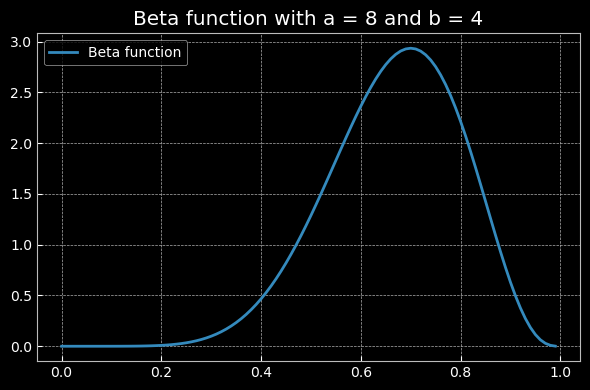

In [5]:
a, b = 8, 4 # Prio mean of 2 / 3
rv = beta(a, b)
pdf_val = rv.pdf(theta)

plt.plot(theta, pdf_val, label = 'Beta function')
plt.legend()
plt.title('Beta function with a = {} and b = {}'.format(a, b))
plt.tight_layout()
plt.show()

4. Find probabilities using cumulative density function

In [6]:
a, b = 8, 4 # Prio mean of 2 / 3
rv = beta(a, b)
theta1, theta2, theta3 = 0.25, 0.5, 0.75
prob1 = 1 - rv.cdf(theta1)
print('The probability with theta = {} is P = {}'.format(theta1, prob1))
prob2 = 1 - rv.cdf(theta2)
print('The probability with theta = {} is P = {}'.format(theta2, prob2))
prob3 = 1 - rv.cdf(theta3)
print('The probability with theta = {} is P = {}'.format(theta3, prob3))

The probability with theta = 0.25 is P = 0.9988117218017578
The probability with theta = 0.5 is P = 0.88671875
The probability with theta = 0.75 is P = 0.2866954803466797


5. Considering that first student gets 33 questions right, what is the posterior for theta1. Posterior    is Beta(8+33,4+40-33) = Beta(41,11)

Recall that: 

$Posterior = Beta(\alpha + \sum y_i, \beta + n - \sum y_i) $

$ Posterior  = Beta(8+33,4+40-33) = Beta(41,11) $

The posterior mean is: 0.7884615384615384
The optimal value of Theta MLE is: 0.825


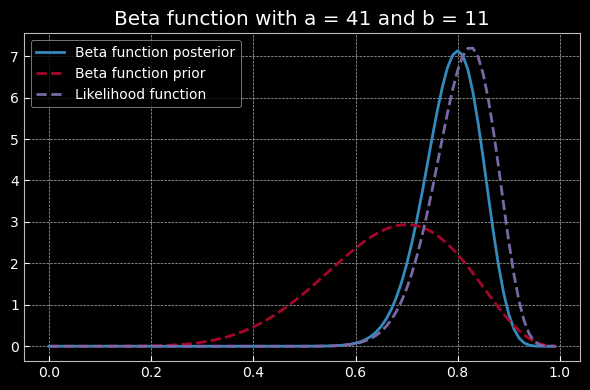

In [7]:
from scipy.stats import binom
# Params
sum_y = 33
n = 40
a, b = 41, 11
post_mean = 41 / (41 + 11)
print('The posterior mean is: {}'.format(post_mean))
MLE = 33 / 40
print('The optimal value of Theta MLE is: {}'.format(MLE))
# Density function (betta) posterior
rv = beta(a, b)
pdf_val = rv.pdf(theta)
# Density function (betta) prior
a_p, b_p = 8, 4
rv_pr = beta(a_p, b_p)
pdf_val_pr = rv_pr.pdf(theta)
# Likelihood
rv_like = binom(n, theta)
pdf_val_like = rv_like.pmf(33)

plt.plot(theta, pdf_val, label = 'Beta function posterior')
plt.plot(theta, pdf_val_pr, '--', label = 'Beta function prior')
# 44 * pdf_val_like is for skiling purpose.
plt.plot(theta, 44*pdf_val_like, '--', label = 'Likelihood function')
plt.legend()
plt.title('Beta function with a = {} and b = {}'.format(a, b))
plt.tight_layout()
plt.show()

It is possible to see how the posterior is more prone to the likelihood rather than the prior! Likelihood is at a different scale as this is not a PMF. This is due to the efective sample size of the likelihood which is of 40 compared with the effective sample size of the prior which is of 11. The likelihood is more important.

Now lets compute the posterior probabilities.

In [8]:
a, b = 41, 11
rv = beta(a, b)
theta1, theta2, theta3 = 0.25, 0.5, 0.8
prob1 = 1 - rv.cdf(theta1)
print('The probability with theta = {} is P = {}'.format(theta1, prob1))
prob2 = 1 - rv.cdf(theta2)
print('The probability with theta = {} is P = {}'.format(theta2, prob2))
prob3 = 1 - rv.cdf(theta3)
print('The probability with theta = {} is P = {}'.format(theta3, prob3))

The probability with theta = 0.25 is P = 0.9999999999999999
The probability with theta = 0.5 is P = 0.9999926311420575
The probability with theta = 0.8 is P = 0.44440438256879644


With a equal-tailed 95% credible interval

In [9]:
# 95% interval
q1 = rv.ppf(0.025)
q2 = rv.ppf(0.975)
print('The value of theta for a 0.95 equal tailed interval between {} and {}'.format(q1, q2))

The value of theta for a 0.95 equal tailed interval between 0.6688426487470713 and 0.8871094002502565


Therefore, most of the mass of theta is between 0.66 and 0.88. Consistent with the plot above.

6. Considering that second student gets 24 questions right, what is the posterior for theta1. Posterior    is Beta(8+24,4+40-24) = Beta(32,20)

Recall that: 

$Posterior = Beta(\alpha + \sum y_i, \beta + n - \sum y_i) $

$ Posterior  = Beta(8+24,4+40-24) = Beta(32,20) $

The posterior mean is: 0.6153846153846154
The optimal value of Theta MLE is: 0.6


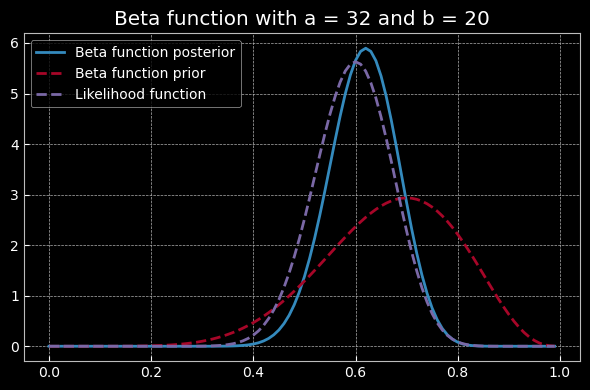

In [10]:
from scipy.stats import binom
# Params
sum_y = 24
n = 40
a, b = 32, 20
post_mean = a / (a + b)
print('The posterior mean is: {}'.format(post_mean))
MLE = sum_y / n
print('The optimal value of Theta MLE is: {}'.format(MLE))
# Density function (betta) posterior
rv = beta(a, b)
pdf_val = rv.pdf(theta)
# Density function (betta) prior
a_p, b_p = 8, 4
rv_pr = beta(a_p, b_p)
pdf_val_pr = rv_pr.pdf(theta)
# Likelihood
rv_like = binom(n, theta)
pdf_val_like = rv_like.pmf(sum_y)

plt.plot(theta, pdf_val, label = 'Beta function posterior')
plt.plot(theta, pdf_val_pr, '--', label = 'Beta function prior')
# 44 * pdf_val_like is for skiling purpose.
plt.plot(theta, 44*pdf_val_like, '--', label = 'Likelihood function')
plt.legend()
plt.title('Beta function with a = {} and b = {}'.format(a, b))
plt.tight_layout()
plt.show()

In [11]:
a, b = 32, 20
rv = beta(a, b)
theta1, theta2, theta3 = 0.25, 0.5, 0.8
prob1 = 1 - rv.cdf(theta1)
print('The probability with theta = {} is P = {}'.format(theta1, prob1))
prob2 = 1 - rv.cdf(theta2)
print('The probability with theta = {} is P = {}'.format(theta2, prob2))
prob3 = 1 - rv.cdf(theta3)
print('The probability with theta = {} is P = {}'.format(theta3, prob3))

The probability with theta = 0.25 is P = 0.9999999863130408
The probability with theta = 0.5 is P = 0.9540427250920729
The probability with theta = 0.8 is P = 0.001248189858039872


With a equal-tailed 95% credible interval

In [12]:
# 95% interval
q1 = rv.ppf(0.025)
q2 = rv.ppf(0.975)
print('The value of theta for a 0.95 equal tailed interval between {} and {}'.format(q1, q2))

The value of theta for a 0.95 equal tailed interval between 0.4808021582419634 and 0.7415563647178172


The results are consistent as the second student did not get as many questions good as the first student.

7. Estimate by simulation: draw 1,000 samples from each and see how often 
   we observe theta1>theta2

In [13]:
beta_1 = beta.rvs(41, 11, size=1000)
beta_2 = beta.rvs(32, 20, size=1000)
mean_val = np.mean(beta_1 > beta_2)
print('The mean value that theta1 is greather than theta2 is {}'.format(mean_val))

The mean value that theta1 is greather than theta2 is 0.968
